# Evaluation and simplification

Finally we reach the most important stage of symbolic computation: automated symbolic manipulations. We will see how to perform different simplifications in our expressions and how to set up substitution rules.

In [4]:
from sympy import *
init_printing()  # import the best printer available
x, y, z, t = symbols('x y z t')
k, m, n = symbols('k m n', integer=True)
f, g, h = symbols('f g h', cls=Function)

### Writing simple fuctions

 In this section we will start defining a simple function

In [5]:
def my_function(x, A=1, B=0):
    """
    This line is the documentation of the function.
    
    Optional arguments:
        - A: polynomial part (default: A=1)
        - B: trigonometric part (default: B=0)
    """
    m = 2   # this variable belongs to the function, we cannot use it outside
    
    return A*x*(x-1)**2*(x+3) + B*(cos(m*x) + sin(x)*cos(x) + sin(x)**m)

with this syntax, the variables A, B are optional parameters. We can call the function without them and their default value is asigned

In [6]:
my_function(x)

or we can modify their value

In [7]:
my_function(x, A=0)

As long as we respect the order, we can modify their value without an explicit asignment

In [8]:
my_function(x, 0, 1)

We will use this function to test different operations.

### Simplification and substitution 

Again, our model function is

In [9]:
expr = my_function(x, 1, 1)
expr

The easiest way of symplifying this expression is

In [10]:
expr.simplify()

`simplify` performs all the types of simplifications that SymPy can think about, keep in mind that we may not want to perform all the simplifications or it can be too time-consuming. We will see more specific tools later on. Another common operation is the substitution of one expression or symbol by another

In [11]:
expr.subs(x, 3)

in this case, the effect of the substitution is the same as calling our function with different arguments

In [12]:
my_function(3, 1, 1)

But we can perform all kind of non-trivial substitutions and create lists of replacements, like in the following example

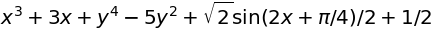

In [13]:
replacements = [(x**i, y**i) for i in range(1, 4) if i%2 == 0]
expr.simplify().subs(replacements)

only the even powers of $x$ have been substituted.

### Evaluation

Once we have a symbolic expression we may want to evaluate it at some points to extract some numbers. One way of doing this is through the `subs` method and using the `evalf` method, as illustrated below

In [14]:
a, b = symbols('alpha, beta')
expr = my_function(x, a, b)
expr

In [15]:
value = expr.subs(a, 1).subs(b, 1).subs(x, 3)
value

In [16]:
value.evalf()

A shorter way, to perform the same task, is to define a dictionary of points where the function is to be evaluated and pass it to the evalf() method

In [17]:
points = {x : 3, a : 1, b : 1}  # dictionary of points -> remember the definition!, e.g. points[x] = 3 ...
expr.evalf(subs = points)

This is a possibility for a small number of points, but it will **not** be our preferred choice. See the Lambdify section below.

#### Lambdify

In this section we will see how to convert a symbolic function into an efficient 'numeric' function. As before, we start with our SymPy function

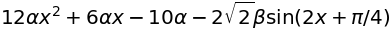

In [18]:
sym_function = expr.diff(x, 2).simplify()
sym_function

Importing the module NumPy

In [19]:
import numpy as np

we can use the `lambdify` function to cast a SymPy function into a NumPy function

In [20]:
num_function = lambdify((x, a, b), sym_function, "numpy")
num_function(3.12, 1, 2)

The main advantage of NumPy is, in simple terms, that it accepts vectors as arguments and evaluates them in a really efficient way.

In [21]:
args = np.arange(10)
args

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
num_function(args, 1, 2)

array([ -14.        ,    6.02739764,   55.64178446,  113.27698085,
        202.62456715,  325.53237056,  456.77087584,  615.4906217 ,
        810.98225119, 1016.36268215])

### Refined simplification

This section is simple enough. You can skim through it and use each function as you need it. All you need to keep in mind is that `simplify` is not the end of the story.

#### Polynomial

In [23]:
expr = my_function(x)
expr

In [24]:
expanded_function = expand(expr) + a*x**2 + 3*b*x
expanded_function

In [25]:
factor(expanded_function)

In [26]:
collected_function = collect(expanded_function, x)
collected_function

In [27]:
collected_function.coeff(x, 2)

#### Trigonometric

In [28]:
expr = my_function(x, 0, 1)
expr

In [29]:
expand_trig(expr)

In [30]:
trigsimp(expr)

Note that there are similar expressions for powers, logarithms and rational functions, check the documentation for more details.